# Importing tools

In [10]:
import pandas as pd 
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

# Data

In [2]:
WW_df = pd.read_csv('winequality-white.csv', delimiter = ';')
RW_df = pd.read_csv('winequality-red.csv', delimiter = ';')

In [3]:
WW_df ["type"] = "white wine"
RW_df ["type"] = "red wine" 

In [4]:
df_wines = pd.concat([WW_df, RW_df])

In [5]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [17]:
df_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<AxesSubplot:xlabel='quality', ylabel='count'>

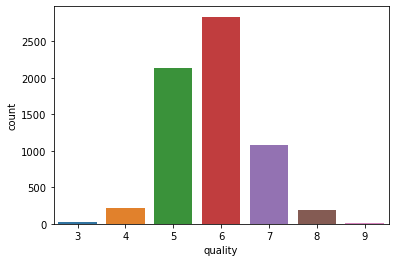

In [11]:
sb.countplot(x = "quality", data = df_wines)

In [14]:
df_wines["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [6]:
# categorizing quality type according to the quality of all the wine samples
df_wines["quality_type"] = df_wines["quality"]. apply(lambda x: "Low" if x<=5 else "Medium" if x <= 6 else "High") 

In [20]:
WW_df ["quality_type"] = WW_df["quality"].apply(lambda x : "Low" if x<=5 else "Medium" if x <= 6 else "High")

In [21]:
RW_df["quality_type"] = RW_df["quality"].apply(lambda x : "Low" if x<=5 else "Medium" if x <= 6 else "High") 

<AxesSubplot:xlabel='quality_type', ylabel='count'>

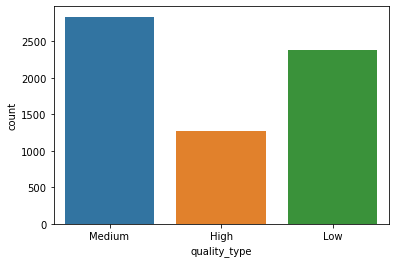

In [12]:
sb.countplot(x = "quality_type", data = df_wines)

In [13]:
df_wines["quality_type"].value_counts()

Medium    2836
Low       2384
High      1277
Name: quality_type, dtype: int64

In [9]:
df_wines.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_type
260,6.9,0.115,0.35,5.4,0.048,36.0,108.0,0.99390,3.32,0.42,10.2,6,white wine,Medium
942,5.4,0.415,0.19,1.6,0.039,27.0,88.0,0.99265,3.54,0.41,10.0,7,white wine,High
1849,7.0,0.240,0.25,1.7,0.042,48.0,189.0,0.99200,3.25,0.42,11.4,6,white wine,Medium


In [8]:
df_wines = df_wines.sample(frac = 1)

## Correlation Matrix

In [15]:
corr = df_wines.corr()

<AxesSubplot:>

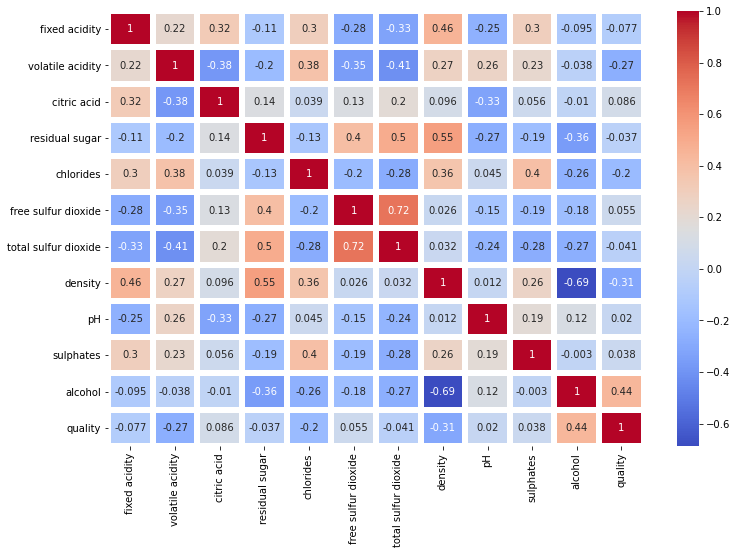

In [16]:
plt.figure(figsize = (12,8))
sb.heatmap(corr, linewidth = 5, cmap = "coolwarm", annot = True)

C:\Users\Selin\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


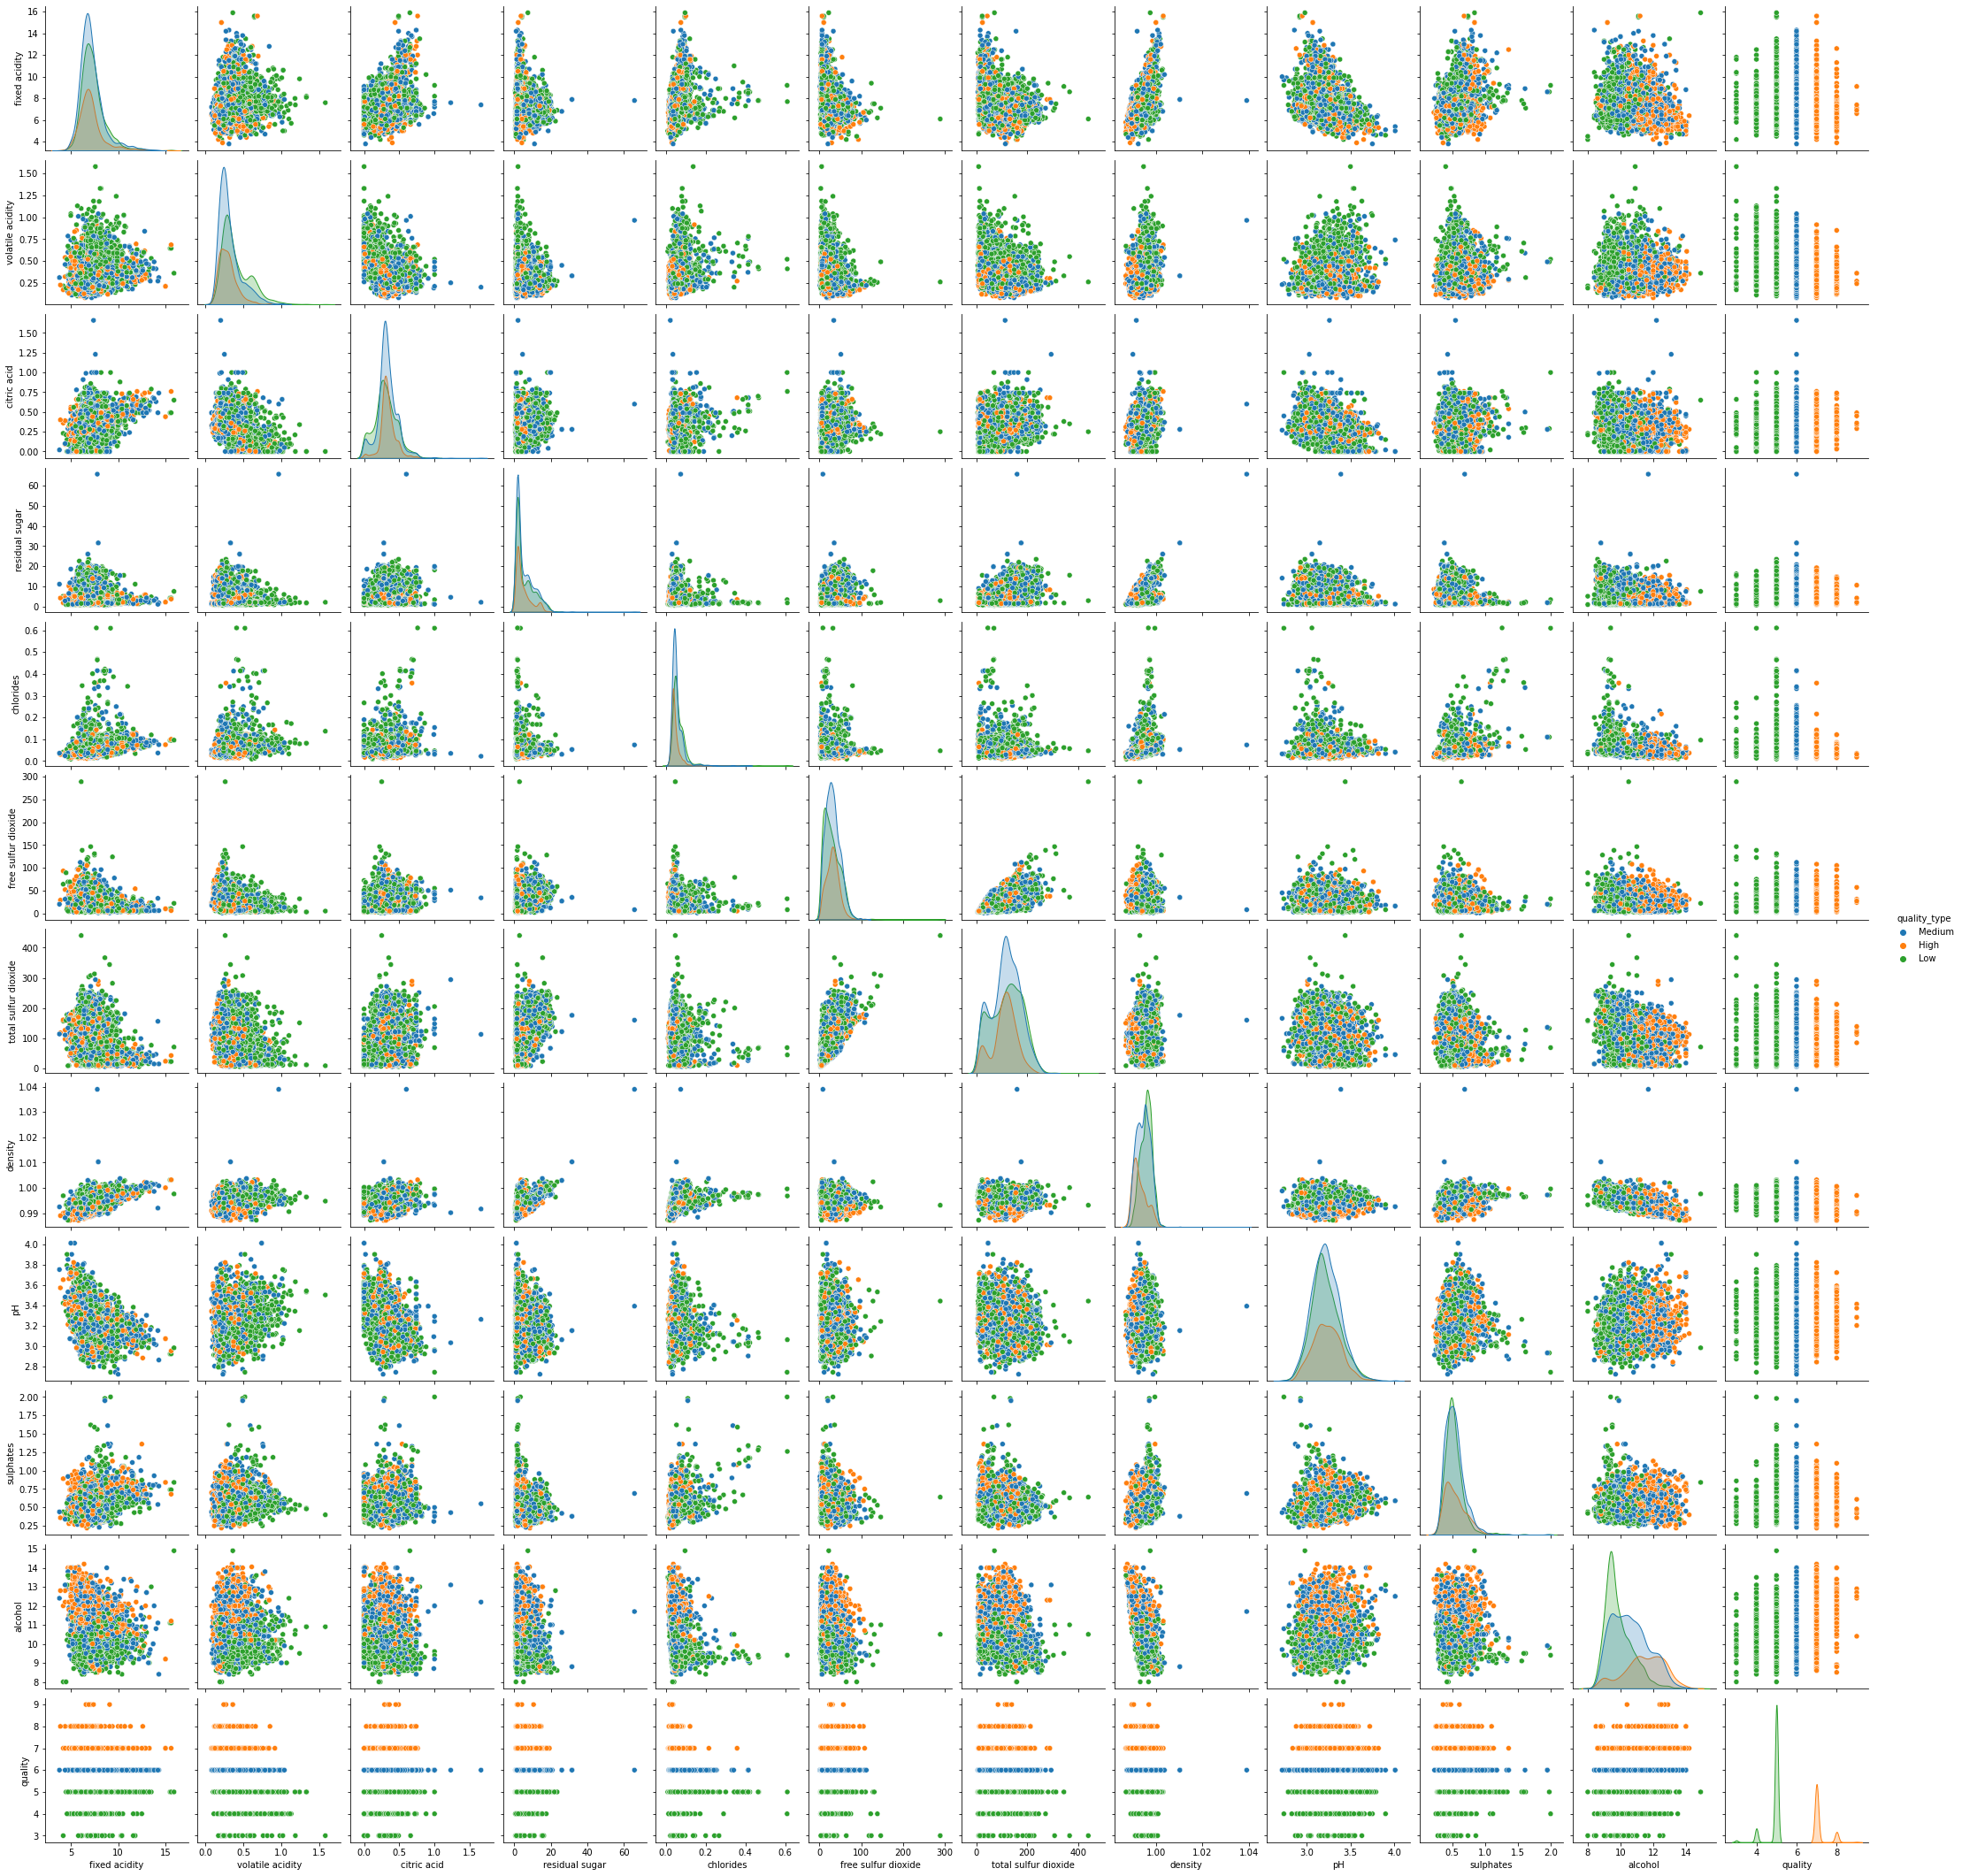

In [22]:
sb.pairplot(df_wines, hue ="quality_type")